# Titanic - analiza danych o pasażerach
<img src="titanic.png" width="800" height="600">

## O Danych
Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.


## O Danych
Kolumny:
* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itables import show
from statsmodels.graphics.mosaicplot import mosaic

# 1. Przegląd i analiza danych dotyczących Titanica i jego pasażerów.

## 1.1 Wczytanie danych i przegląd losowych wartości.

In [37]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [39]:
df[['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch']].sample(6, random_state=42)

,pclass,survived,name,sex,age,sibsp,parch
701,3.0,0.0,"Calic, Mr. Petar",male,17.0,0.0,0.0
994,3.0,0.0,"Mardirosian, Mr. Sarkis",male,NaN,0.0,0.0
350,2.0,1.0,"Brown, Miss. Edith Eileen",female,15.0,0.0,2.0
986,3.0,0.0,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0.0,0.0
409,2.0,0.0,"Fox, Mr. Stanley Hubert",male,36.0,0.0,0.0
917,3.0,1.0,"Karun, Mr. Franz",male,39.0,0.0,1.0


In [40]:
df[['ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']].sample(6, random_state=42)

,ticket,fare,cabin,embarked,boat,body,home.dest
701,315086,8.6625,NaN,S,NaN,NaN,NaN
994,2655,7.2292,F E46,C,NaN,NaN,NaN
350,29750,39.0000,NaN,S,14,NaN,"Cape Town, South Africa / Seattle, WA"
986,STON/O 2. 3101275,7.1250,NaN,S,NaN,NaN,NaN
409,229236,13.0000,NaN,S,NaN,236.0,"Rochester, NY"
917,349256,13.4167,NaN,C,15,NaN,NaN


#### Po wczytaniu danych mamy informację o 1310 wierszach i 14 kolumnach. 
#### Zauważyć można, że w wierszu 1309, we wszystkich kolumnach są puste wartości, należy zatem usunąć ten wiersz przed przystąpieniem, do dalszej analizy.
#### Po przeglądzie losowych wartości widać, że istnieje wiele pustych wartości w niektórych kolumnach. W dalszej analizie, należy zastanowić się, czy brakujące wartości będą miały istotny wpływ na wyniki analizy i czy będzie potrzeba wypełnienia tych wartości.

#### Jeden z wierszy ma puste wartości we wszystkich kolumnach

In [5]:
empty_rows = df[df.isnull().all(axis=1)]
empty_rows

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Usuwam wiersz z pustymi wartościami.

In [6]:
df = df.dropna(how = 'all')

## 1.2 Sprawdzenie wartości unikatowych.

In [7]:
pd.DataFrame(df.nunique())

,0
pclass,3
survived,2
name,1307
sex,2
age,98
sibsp,7
parch,8
ticket,929
fare,281
cabin,186


#### Krótkie spostrzeżenia o wartościach unikatowych:
* **pclass** - 3 klasy biletów (ilu pasażerów w każdej klasie)
* **survived** - 2 wartości oznaczające czy pasażer ocalał, czy nie(sprawdzić ilu ocalonych)
* **name** - 1307 nazwisk na 1309 rekordów (sprawdzić duplikaty)
* **sex** - 2 wartości oznaczające płeć (sprawdzić ile kobiet/mężczyzn)
* **age** - 98 wartości określających wiek (w losowych danych widać wiek podany jako ułamek, zamienić na liczby całkowite, ponownie sprawdzić wartości unikatowe)
* **sibsp** - 7 wartości dla liczby rodzeństwa/małżonków na pokładzie
* **parch** - 8 wartości dla rodziców/dzieci na pokładzie
* **ticket** - 929 wartości z numerem biletu (sprawdzić duplikaty, dlaczego występują)
* **fare** - 281 wartości z różną ceną biletu(sprawdzić od czego uzależniona cena)
* **cabin** - 186 numerów kabin
* **embarked** - 3 rożne porty wejścia pasażerów na pokład
* **boat** - 27 numerów łodzi ratunkowych(jakieś zależności?)
* **body** - 121 wartości dla odnalezionych ciał ofiar katastrofy
* **home.dest** - 369 wartości dla celu podróży pasażerów(sprawdzić korelację ocalony cel podrózy)




## 1.3 Przegląd danych statystycznych.

In [8]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


##### Mamy 7 kolumn numerycznych, przechowujących dane o klasie bilety, ocalałych, wieku, rodzeństwa/małżonków, rodziców/dzeici, cenie biletu, odnalezionym ciele ofiary.
##### Katastrofę przeżyło 38% pasażerów.
##### Najmłodszy z pasażerów miał mniej niż rok, najstarszy 80 lat, średni wiek to ok 30 lat.
##### 49% pasażerów podróżowało z małżonkiem lub rodzeństwem.
##### 38% pasażerów było rodzicami/dziećmi
##### Średnia cena biletu to 33. najtańszy bilet kosztował 0, najdroższy 512.
##### Odnaleziono 121 ciał.

# 2 Analiza brakujących wartości.

In [9]:
pd.DataFrame(df.isnull().sum())

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


#### Brakujące dane:
* **age** 263 dane o wieku (naprawić średnią dla mężczyzn i kobiet?)
* **fare** 1 cena biletu (naprawić średnią ceną)
* **cabin** 1014 danych o numerze kabiny
* **embarked** 2 informacje o porcie wejścia pasażerów na pokład
* **boat** 823 numer łodzi ratunkowej, w której przebywał pasażer (sprawdzic brakujące wartośći dla ocalałych pasażerów)
* **body** 1188 numer ciała
* **home.dst** 564 celu podróży.

# 3 Analiza poszczególnych danych.

#### PCLASS - ilość pasażerów w każdej klasie

In [10]:
# Ile osob podróżowało w danej klasie
pd.DataFrame(df['pclass'].value_counts().sort_index())

,count
pclass,
1.0,323
2.0,277
3.0,709


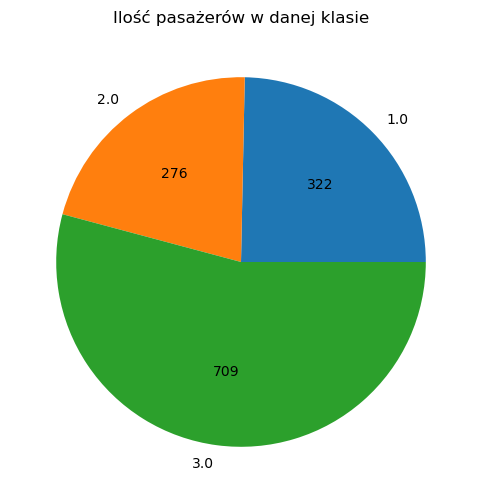

In [11]:
pcl = df['pclass'].value_counts().sort_index()
plt.figure(figsize=(6, 6))
plt.pie(pcl, labels=pcl.index, autopct=lambda p: f'{int(p * sum(pcl) / 100)}')
plt.title('Ilość pasażerów w danej klasie');

##### Mamy tutaj 3 klasy, w których podróżowali pasażerowie.
##### W klasie 1 podróżowało 323 pasażerów, w klasie 2 podróżowało 277 pasażerów, w klasie 3 podróżowało 709 pasażerów.

#### SURVIVED - ilość ocalałych i ofiar

In [12]:
# Ile osób zginęło/przeżyło
passengers = df.groupby(['survived']).size()
passengers.index = ['Zginęło', 'Przeżyło']
pd.DataFrame(passengers, columns = ['Ilość'])

,Ilość
Zginęło,809
Przeżyło,500


##### Katasrtofę przeżyło 500 pasażerów, zginęło 809 pasażerów.

#### SEX - ilość kobiet i mężczyzn wśród pasażerów, dane o ofiarach

In [13]:
# Ile kobiet, mężczyzn podróżowało
journey_m_f = df.groupby(['sex']).size()
journey_m_f.index = ['Kobiet', 'Mężczyzn']
pd.DataFrame(journey_m_f, columns = ['Ilość'])

,Ilość
Kobiet,466
Mężczyzn,843


##### Wśród pasażerów było 466 i 843 mężczyzn

In [14]:
# Ile kobiet, mężczyzn zginęło/przeżyło
survived_m_f = df.groupby(['survived', 'sex']).size().unstack()
survived_m_f.index = ['Zginęło', 'Przeżyło']
survived_m_f.columns = ['Kobiet', 'Mężczyzn']
survived_m_f

,Kobiet,Mężczyzn
Zginęło,127,682
Przeżyło,339,161


##### Spośród 500 ocalonych, przeżyło 339 kobiet i 161 meżczyzn.

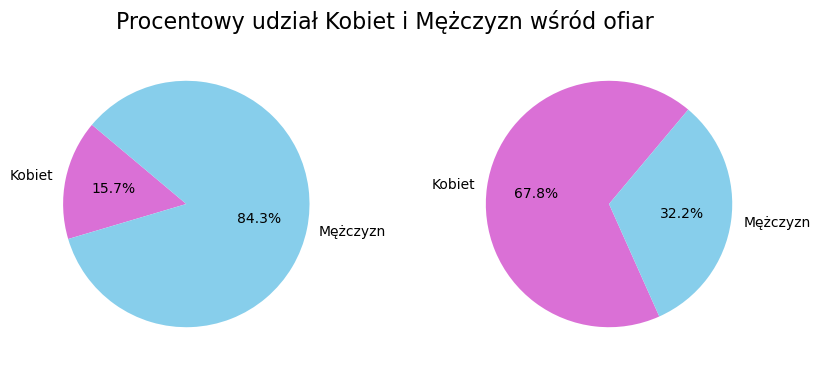

In [15]:
colors = {'Mężczyzn': 'skyblue', 'Kobiet': 'orchid'}
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle('Procentowy udział Kobiet i Mężczyzn wśród ofiar', fontsize=16)

# Wykres Zginęło
axes[0].pie(survived_m_f.loc['Zginęło'], labels=survived_m_f.columns, autopct='%1.1f%%', 
            colors=[colors[sex] for sex in survived_m_f.columns], startangle=140)

# Wykres Przeżyło
axes[1].pie(survived_m_f.loc['Przeżyło'], labels=survived_m_f.columns, autopct='%1.1f%%', 
            colors=[colors[sex] for sex in survived_m_f.columns], startangle=50)

# Wyświetlenie wykresu
plt.show()


##### Ilość ocalonych pasażerów w każdej z klas

In [52]:
# Ile osób przeżyło w danej klasie 
survived_by_class = df.groupby('pclass')['survived'].sum()
survived_by_class.columns = ['Przeżyło']
pd.DataFrame(survived_by_class)

#pd.DataFrame(df.groupby('pclass')['survived'].sum())

,survived
pclass,
1.0,200.0
2.0,119.0
3.0,181.0


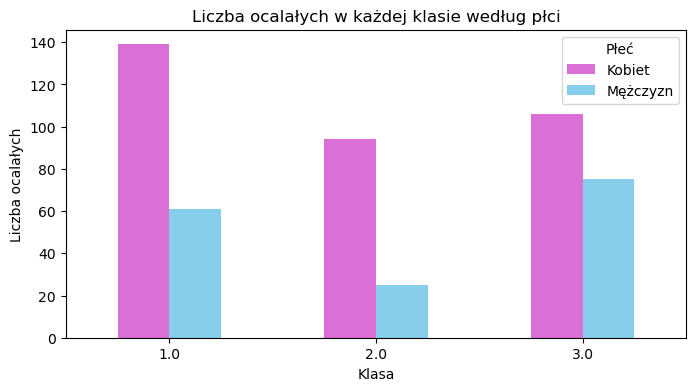

In [17]:
survived_by_class_m_f = df[df['survived'] == 1].groupby(['pclass', 'sex']).size().unstack()

survived_by_class_m_f.plot(kind='bar', figsize=(8, 4), color=['orchid', 'skyblue'])

# Dodanie etykiet i tytułu
plt.title('Liczba ocalałych w każdej klasie według płci')
plt.xlabel('Klasa')
plt.ylabel('Liczba ocalałych')
plt.legend(title='Płeć', labels=['Kobiet', 'Mężczyzn'])
plt.xticks(rotation=0)  
plt.show()


##### Podróżujących w klasie 1 ocalało 200 z 323 osób, w klasie 2 ocalało 119 z 277 osób, w klasie 3 ocalało 181 z 709 osób

#### AGE - wiek pasażerów

In [18]:
pd.DataFrame(df['age'].unique())

,0
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000
...,...
94,60.5000
95,74.0000
96,0.4167
97,11.5000


##### Ponieważ wiek nie jest podany w liczbach całkowitych, zaokraglę go i zapiszę w nowej kolumnie

In [19]:
df['age_round'] = df['age'].round()
pd.DataFrame(df['age_round'].unique())

,0
0,29.0
1,1.0
2,2.0
3,30.0
4,25.0
...,...
69,66.0
70,9.0
71,0.0
72,10.0


##### Po zaokragleniu wieku pasażerów do liczb całkowitych, otrzymałem 74 wartośći unikatowe. Dane zapisałem w nowej kolumnie - age_round.

##### Średni wiek pasażerów to blisko 30 lat, najmłodszy pasażer jest noworodkiem poniżej pół roku życia, najstrszy pasażer ma 80 lat.

In [20]:
pd.DataFrame(df['age_round'].describe())

,age_round
count,1046.000000
mean,29.870937
std,14.411571
min,0.000000
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [21]:
# zmiana nazwy oryginalnej kolumny "age"
df = df.rename(columns={'age': 'age_raw'})

In [22]:
# zmiana kolumny "age_round", na kolumne "age"
df = df.rename(columns={'age_round': 'age'})

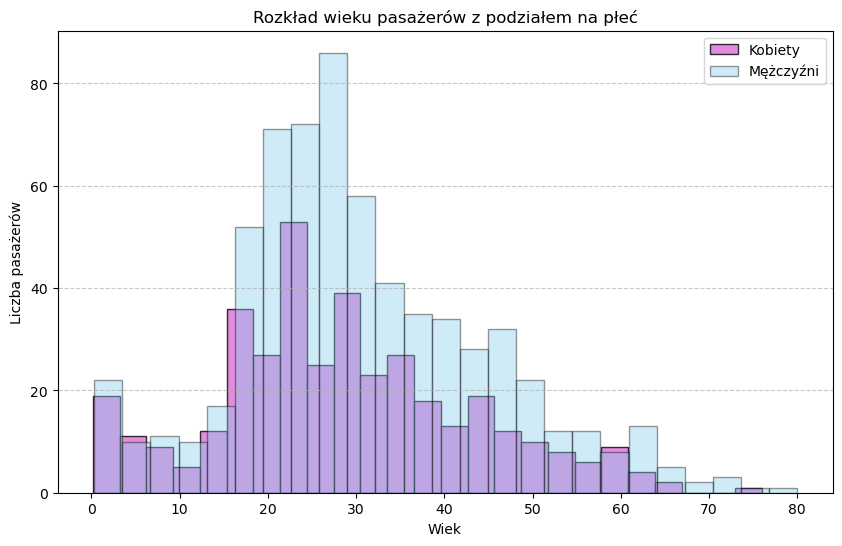

In [55]:
# Podział danych na kobiety i mężczyzn
female = df[df['sex'] == 'female']['age']
men = df[df['sex'] == 'male']['age']

# Tworzenie histogramu
plt.figure(figsize=(10, 6))
plt.hist(female, bins=25, alpha=0.8, color='orchid', label='Kobiety', edgecolor='black')
plt.hist(men, bins=25, alpha=0.4, color='skyblue', label='Mężczyźni', edgecolor='black')

# Ustawienia wykresu
plt.title('Rozkład wieku pasażerów z podziałem na płeć')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()


#### SIBSP - liczba rodzeństwa, małżonków na pokładzie

In [56]:
sibsp_greater_than_zero_count = df['sibsp'].dropna().gt(0).sum()
print(f"{sibsp_greater_than_zero_count} pasażerów było na pokładzie z rodzeństwem lub małżonkiem.")

418 pasażerów było na pokładzie z rodzeństwem lub małżonkiem.


#### PARCH - liczba rodziców, dzieci na pokładzie

In [57]:
parch_greater_than_zero_count = df['parch'].dropna().gt(0).sum()
print(f"{parch_greater_than_zero_count} pasażerów było na pokładzie z rodzicem lub dzieckiem.")

307 pasażerów było na pokładzie z rodzicem lub dzieckiem.


#### TICKET - numer biletu

In [26]:
pd.DataFrame(df['ticket'].describe())

,ticket
count,1309
unique,929
top,CA. 2343
freq,11


##### Numery biletu mają 929 wartości unikatowych, na 1309 pozycji, należy sprawdzić duplikaty.

#### FARE - cena biletu

In [27]:
fare_stats = df.groupby(['pclass'])['fare'].describe()
fare_stats

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1.0,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2.0,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3.0,708.0,13.302889,11.494358,0.0,7.7500,8.0500,15.2458,69.5500


##### Cena biletu uzależniona była od klasy biletu. Średnia cena biletu dla klasy 1 to 87, dla klasy 2 to 13, dla klasy 3 to 11. 
##### Najdroższy bilet miał cenę 512, najtańsze 0.

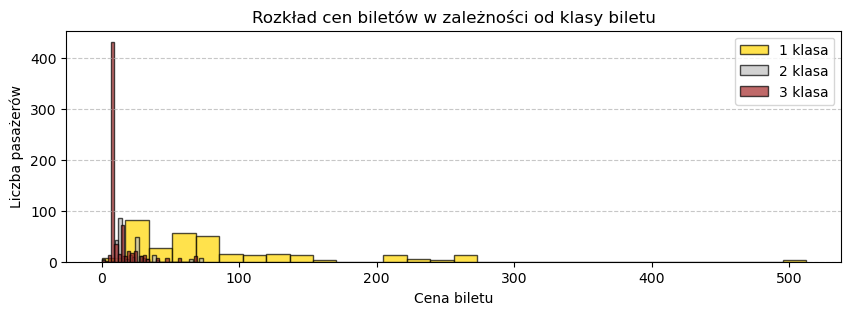

In [28]:
class_1 = df[df['pclass'] == 1]['fare']
class_2 = df[df['pclass'] == 2]['fare']
class_3 = df[df['pclass'] == 3]['fare']

# Tworzenie histogramu
plt.figure(figsize=(10, 3))
plt.hist(class_1, bins=30, alpha=0.7, color='gold', label='1 klasa', edgecolor='black')
plt.hist(class_2, bins=30, alpha=0.7, color='silver', label='2 klasa', edgecolor='black')
plt.hist(class_3, bins=30, alpha=0.7, color='brown', label='3 klasa', edgecolor='black')

# Ustawienia wykresu
plt.title('Rozkład cen biletów w zależności od klasy biletu')
plt.xlabel('Cena biletu')
plt.ylabel('Liczba pasażerów')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()

##### Bardzo duża rozpiętość cen biletów, zwlaszcza w klasie 1. Najwięcej wartośći zarejestrowanych w okolicy 10 dla klasy 3.

##### Dla lepszego zobrazowania dla klas 1 i 2, wykres z ograniczonym zakresem

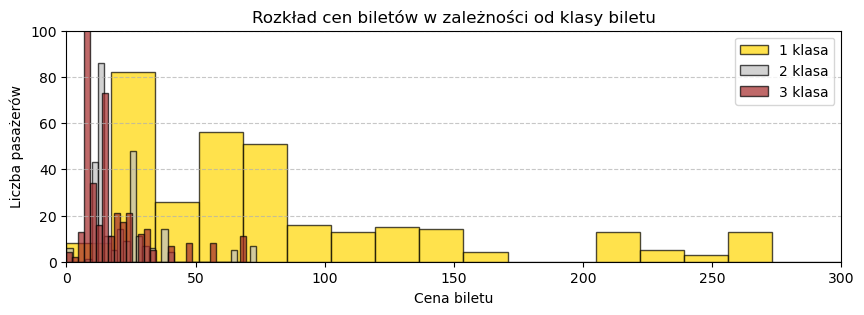

In [61]:
class_1 = df[df['pclass'] == 1]['fare']
class_2 = df[df['pclass'] == 2]['fare']
class_3 = df[df['pclass'] == 3]['fare']

# Tworzenie histogramu
plt.figure(figsize=(10, 3))
plt.hist(class_1, bins=30, alpha=0.7, color='gold', label='1 klasa', edgecolor='black')
plt.hist(class_2, bins=30, alpha=0.7, color='silver', label='2 klasa', edgecolor='black')
plt.hist(class_3, bins=30, alpha=0.7, color='brown', label='3 klasa', edgecolor='black')

# Ustawienia wykresu
plt.title('Rozkład cen biletów w zależności od klasy biletu')
plt.xlabel('Cena biletu')
plt.xlim(0,300)
plt.ylabel('Liczba pasażerów')
plt.ylim(0,100)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Wyświetlenie wykresu
plt.show()

#### CABIN - numer kabiny

In [29]:
pd.DataFrame(df['cabin'].describe())


,cabin
count,295
unique,186
top,C23 C25 C27
freq,6


##### Mamy informacje o 295 kabinach, które posiadają 186 wartości unikatowych.

#### EMBARKED - port wejścia na pokład

In [30]:
pd.DataFrame(df['embarked'].value_counts())

,count
embarked,
S,914
C,270
Q,123


##### Mamy dane na temat 3 portów, w których pasażerowie wchodzili na pokład.
##### S = Southampton - 914 pasażerów
##### C = Cherbourg - 270 paseżerów
##### Q = Queenstown - 123 pasażerów

#### BOAT - numer łodzi ratunkowej

In [31]:
pd.DataFrame(df['boat'].describe())

,boat
count,486
unique,27
top,13
freq,39


##### Mamy informacje o 27 unikatowych numerach łodzi ratunkowcyh.

#### BODY - numer ciała jeśli pasażer nie przeżył i ciało zostało odnalezione

In [32]:
pd.DataFrame(df['body'].unique())

,0
0,NaN
1,135.0
2,22.0
3,124.0
4,148.0
...,...
117,14.0
118,131.0
119,312.0
120,328.0


##### Mamy informacje o 121 unikatowych numerach odnalezionych ciał.

#### HOME.DEST - miejsce docelowe podróżujących

In [33]:
show(df['home.dest'].unique())

Loading ITables v2.4.2 from the internet... (need help?)


##### Mamy informacje o 370 unikatowych miejsach docelowych. Jednak po przeglądzie częśći rekordów, widać, że niektóre częściowo powtarzają się, poprzez podanie np. 2 miejsc docelowych (London/NY, itd.)

#####

# 4. Transformacja danych.

#### Duplikaty

In [34]:
pd.DataFrame(df[df.duplicated(subset='ticket', keep=False)])

,pclass,survived,name,sex,age_raw,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",29.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",2.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,3.0,0.0,"Yasbeck, Mr. Antoni",male,27.0000,1.0,0.0,2659,14.4542,NaN,C,C,NaN,NaN,27.0
1300,3.0,1.0,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0000,1.0,0.0,2659,14.4542,NaN,C,NaN,NaN,NaN,15.0
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14.4583,NaN,C,NaN,NaN,NaN,NaN
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN,14.0


##### W numeracji biletów występują identyczne numery, jednak są przypisane do różnych osób o podobnych nazwiskach, co pozwala sądzić, że na jeden bilet przypisany był do kilku osób, np. rodziny.

In [35]:
pd.DataFrame(df[df.duplicated(subset='name', keep=False)])

,pclass,survived,name,sex,age_raw,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age
725,3.0,1.0,"Connolly, Miss. Kate",female,22.0,0.0,0.0,370373,7.7500,NaN,Q,13,NaN,Ireland,22.0
726,3.0,0.0,"Connolly, Miss. Kate",female,30.0,0.0,0.0,330972,7.6292,NaN,Q,NaN,NaN,Ireland,30.0
924,3.0,0.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,NaN,Q,NaN,70.0,NaN,34.0
925,3.0,0.0,"Kelly, Mr. James",male,44.0,0.0,0.0,363592,8.0500,NaN,S,NaN,NaN,NaN,44.0


##### Występują dwa identyczne nazwiska, jednak posiadają różne dane odnośnie wieku i numeru biletu. Można zatem stwierdzić, że nie są duplikatami.

#### Naprawa brakujących wartości

##### AGE - Wypełnienie brakujących wartości wieku, średnią arytmetyczną dla kobiet i mężczyzn

In [36]:
# Obliczenie średniego wieku dla każdej płci
age_mean_f = df[df['sex'] == 'female']['age'].mean().round()
age_mean_m = df[df['sex'] == 'male']['age'].mean().round()

# Uzupełnienie brakujących wartości
df.loc[df['sex'] == 'female', 'age'] = df.loc[df['sex'] == 'female', 'age'].fillna(age_mean_f)
df.loc[df['sex'] == 'male', 'age'] = df.loc[df['sex'] == 'male', 'age'].fillna(age_mean_m)

# Sprawdzenie, czy nadal są puste wartości
missing_age = df[df['age'].isna()]['sex'].value_counts()
pd.DataFrame(missing_age)


,count
sex,


##### FARE - Wypełnienie brakujących wartości ceny biletu, średnią arytmetyczną.

In [37]:
fare_na = df[df['fare'].isna()]
fare_na

,pclass,survived,name,sex,age_raw,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN,261.0,NaN,60.0


In [38]:
fare_mean = df[df['pclass'] == 3]['fare'].mean().round(2)
fare_mean

13.3

In [39]:
# Obliczenie średniej ceny biletu w 3 klasie
fare_mean = df[df['pclass'] == 3]['fare'].mean().round(2)

# Uzupełnienie brakujących wartości
df['fare'] = df['fare'].fillna(fare_mean)


# Sprawdzenie, czy nadal są puste wartości
fare_na = df[df['fare'].isna()]
fare_na

,pclass,survived,name,sex,age_raw,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age


##### BOAT - sprawdzenie pustych wartości o łodzi ratunkowej dla ocalałych pasażerów

In [40]:
boat_na = df[df['survived'] == 1]['boat'].isna().sum()
pd.DataFrame({'Empty Boat Count': [boat_na]})


,Empty Boat Count
0,23


##### Występują puste wartości o nemarach łodzi ratunkowych, w których byli ocaleni pasażerowie. Może to być wynikiem nieścisłości w zbieraniu danych lub mogło być wynikiem uratowania pasażerów w inny sposób.

# 5. Analiza relacji między zmiennymi

#### Klasa biletu, odsetek ocalałych.

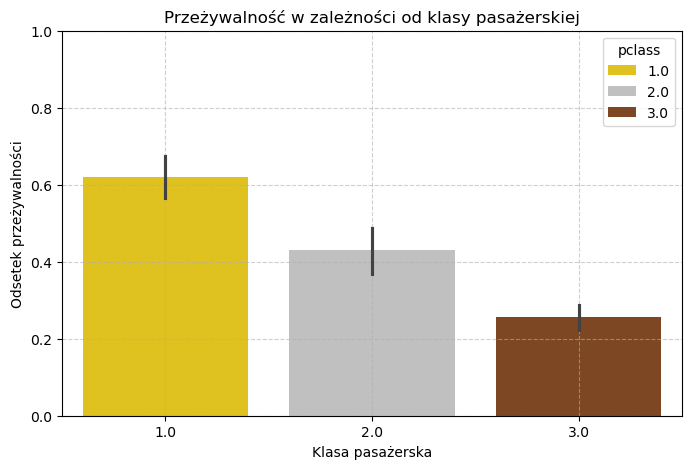

In [41]:
plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='survived', data=df, hue='pclass', palette={1: '#FFD700', 2: '#C0C0C0', 3: '#8B4513'})

plt.title('Przeżywalność w zależności od klasy pasażerskiej')
plt.xlabel('Klasa pasażerska')
plt.ylabel('Odsetek przeżywalności')
plt.ylim(0, 1)  # Ograniczenie do wartości procentowych
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##### Wykres pokazuje, że pasażerowie podróżujący w wyższej klasie, mieli większe szanse na przeżycie (1 - klasa najwyższa, 3 - klasa najniższa).

#### Cena biletu, klasa pasażerska.

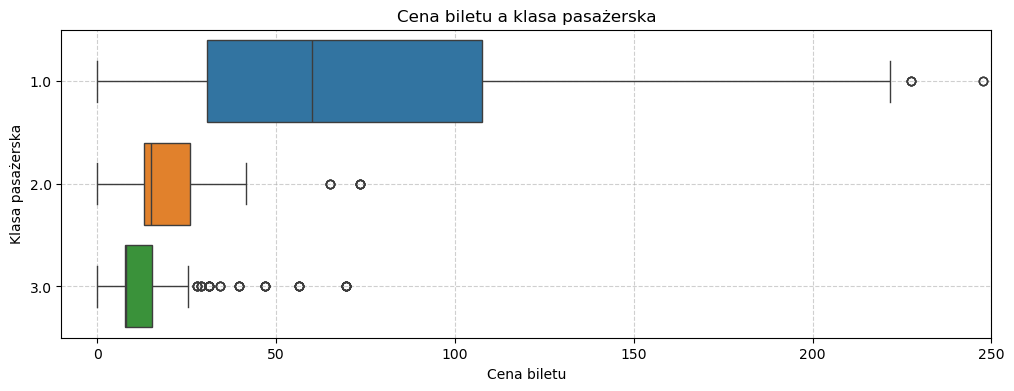

In [63]:
df_temp = df.copy()
df_temp['pclass'] = df_temp['pclass'].astype(str)

plt.figure(figsize=(12, 4))
sns.boxplot(x='fare', y='pclass', data=df_temp, hue='pclass', vert=False,)

plt.title('Cena biletu a klasa pasażerska')
plt.xlabel('Cena biletu')
plt.xlim(-10, 250)
plt.ylabel('Klasa pasażerska')
#plt.xscale('log')  # Skala logarytmiczna dla czytelności
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##### Z wykresu wynika, że 75% wawrtośći dla ceny biletu w klasie 3, jest poniżej 50% wartości cen biletu w klasie 2. Natomiast większość wartości cen biletów z klasy 3 i ponad 75% wartośći cen biletów z klasy 2 jest poniżej 25% wartości cen biletów w klasie 1.

#### Cena biletu, ocalenie.

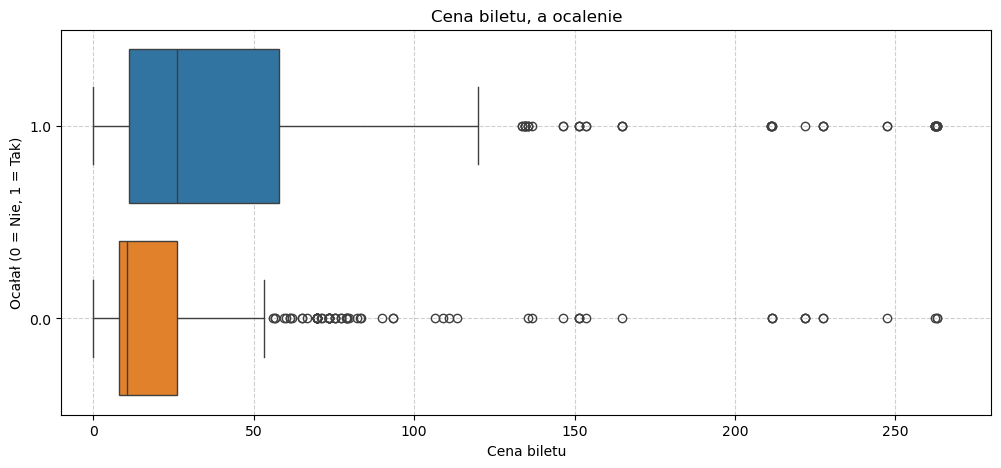

In [43]:
df_temp['survived'] = df_temp['survived'].astype(str)

plt.figure(figsize=(12, 5))
sns.boxplot(x='fare', y='survived', data=df_temp, hue='survived', vert=False)

plt.title('Cena biletu, a ocalenie')
plt.xlabel('Cena biletu')
plt.xlim(-10, 280)
plt.ylabel('Ocałał (0 = Nie, 1 = Tak)')
#plt.xscale('log')  # Skala logarytmiczna dla czytelności
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##### Wykres wykazuje, że cena jaką pasażer zapłacił za bilet, miała znczny wpływ na to, czy pasażer ocalał, czy nie.
##### Jednak patrząc na wartości odstające mamy sporo zbliżonych cen biletu zarówno wśród pasażerów, którzy przeżyli, jak i zmarli.

#### Ocaleni, płeć, klasa.

<Figure size 1000x600 with 0 Axes>

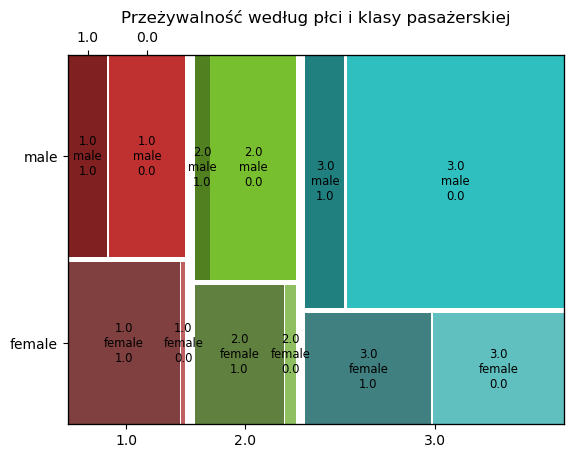

In [44]:
# Tworzenie wykresu mozaikowego
plt.figure(figsize=(10, 6))
mosaic(df, ['pclass', 'sex', 'survived'], title='Przeżywalność według płci i klasy pasażerskiej', gap=0.02)
plt.show()

##### Kobiety przeważają pod względem ocalenia. Im wyższa klasa pasażerska, tym większy odsetek kobier ocalał. Wśród mężczyzn największy odsetek ocalałych jest w klasie 1.

#### Łodzie ratunkowe, klasa pasażerska.

In [45]:
pd.DataFrame(df.groupby('pclass')['boat'].count())

,boat
pclass,
1.0,201
2.0,112
3.0,173


##### Na łodziach ratunkowych zarejestrowano 201 osób z klasy 1, 112osób z klasy 2 oraz 173 osoby z klasy 3.

#### Ciała ofiar z podziałem na klase.

In [46]:
pd.DataFrame(df.groupby('pclass')['body'].count())

,body
pclass,
1.0,35
2.0,31
3.0,55


##### Odnaleziono 35 ciał spośród ofiar z 1 klasy, 31 ciał spośród ofiar z 2 klasy, 55 ciał spośród ofiar z 3 klasy.

#### Macierz korelacji dla kolumn numerycznych.

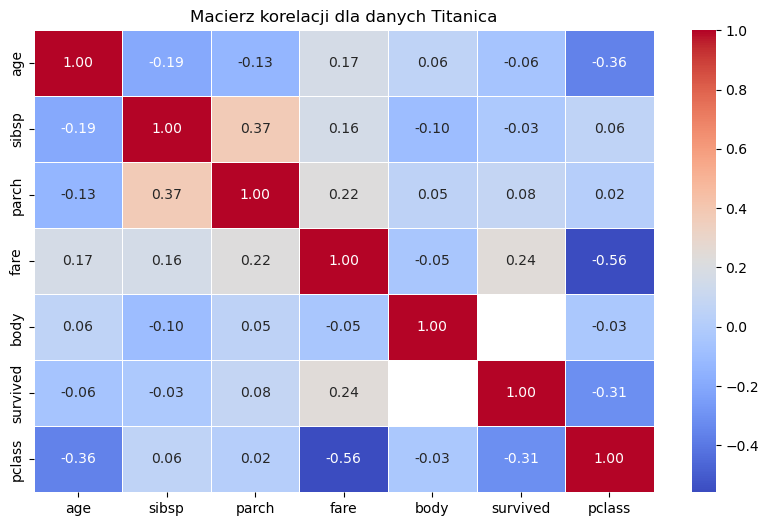

In [47]:
# Obliczenie macierzy korelacji
correlation_matrix = df[['age','sibsp','parch', 'fare', 'body', 'survived', 'pclass']].corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Macierz korelacji dla danych Titanica")
plt.show()


##### Widzimy korelację pomiędzy rodzinami(sibsp i parch). A także odwróconą korelacje pomiedzy klasą pasażerską(pclass), a wiekiem(age), ceną biletu(fare) i ocalonymi(survived).

# 6. Wartości odstające.

#### Cena biletu.

In [48]:
fare_stats = df.groupby(['pclass'])['fare'].describe()
fare_stats

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1.0,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2.0,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3.0,709.0,13.302885,11.486238,0.0,7.7500,8.0500,15.2458,69.5500


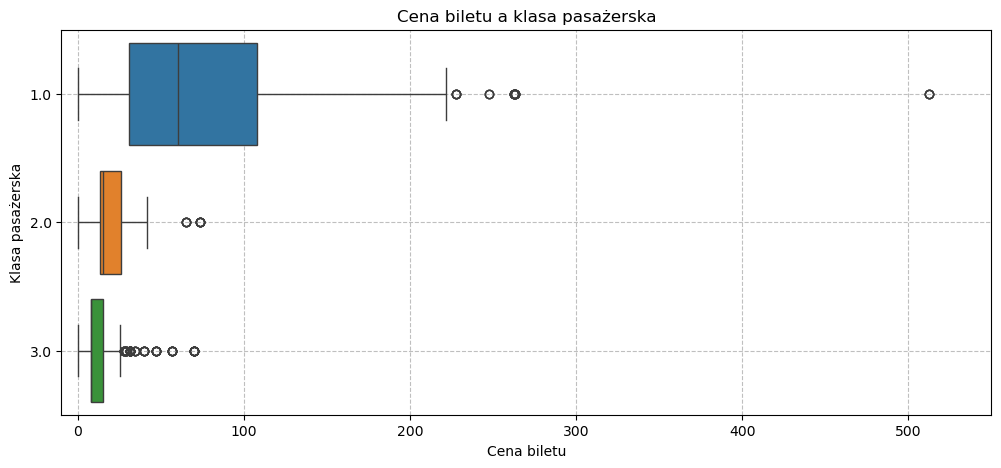

In [49]:
df_temp['pclass'] = df_temp['pclass'].astype(str)

plt.figure(figsize=(12, 5))
sns.boxplot(x='fare', y='pclass', data=df_temp, hue='pclass', vert=False,)

plt.title('Cena biletu a klasa pasażerska')
plt.xlabel('Cena biletu')
plt.xlim(-10, 550)
plt.ylabel('Klasa pasażerska')
#plt.xscale('log')  # Skala logarytmiczna dla czytelności
plt.grid(True, linestyle='--', alpha=0.8)
plt.show()

##### Wartości odstające dla cen biletów największą rozpiętość mają w klasie 1: w przybliżeniu od 220 do 520, w klasie 2 od 40 do 75, w klasie 3 od 25 do 70

#### Wiek.

In [50]:
pd.DataFrame(df['age'].describe())

,age
count,1309.000000
mean,29.978610
std,12.889776
min,0.000000
25%,22.000000
50%,30.000000
75%,35.000000
max,80.000000


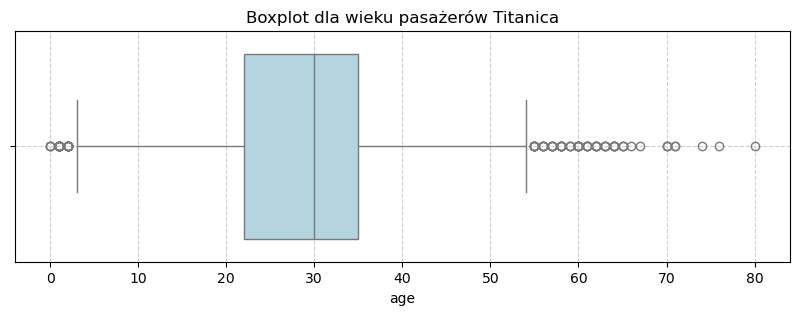

In [51]:
# Tworzenie wykresu pudełkowego (boxplot)
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['age'], color='lightblue', vert=False)

# Opisy wykresu
plt.title('Boxplot dla wieku pasażerów Titanica')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

##### Dane o wieku posiadają wartości odstające zarówno przy wartościach minimalnych - poniżej 2 lat, jak i maksymalnych - powyżej 53 lata.

#### Liczba rodzeństwa, małżonków na pokładzie

In [52]:
pd.DataFrame(df['sibsp'].describe())

,sibsp
count,1309.000000
mean,0.498854
std,1.041658
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


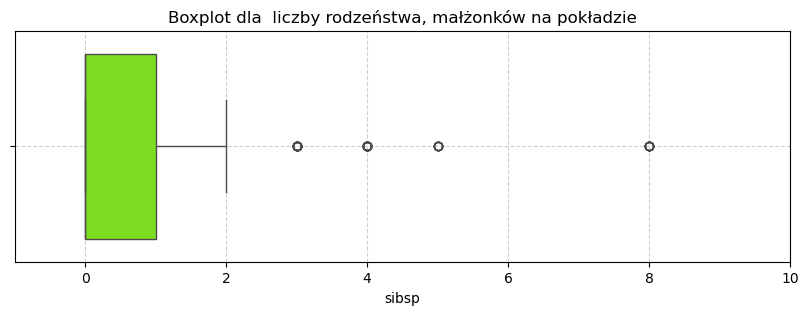

In [53]:
# Tworzenie wykresu pudełkowego (boxplot)
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['sibsp'], color='lawngreen', vert=False)

# Opisy wykresu
plt.title('Boxplot dla  liczby rodzeństwa, małżonków na pokładzie')
plt.xlim(-1, 10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

##### 75% onserwacji miało 1 członka rodziny na pokładzie, wartości odstające było sięgały 8 członków rodziny.

#### Liczba rodziców, dzieci na pokładzie.

In [54]:
pd.DataFrame(df['parch'].describe().dropna())

,parch
count,1309.000000
mean,0.385027
std,0.865560
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9.000000


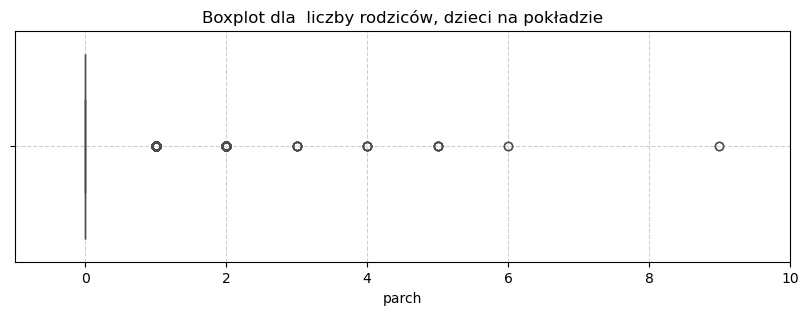

In [55]:
# Tworzenie wykresu pudełkowego (boxplot)
plt.figure(figsize=(10, 3))
sns.boxplot(x=df['parch'], color='orangered', vert=False)

# Opisy wykresu
plt.title('Boxplot dla  liczby rodziców, dzieci na pokładzie')
plt.xlim(-1, 10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

#### 75% obserwacji nie miało żadnego członka rodziny na pokładzie. Wartości odstające sięgały 9 członków rodziny. 

# Podsumowanie

#### Liczebność i zakres danych: 
Analizowany zbiór obejmuje 1310 pasażerów i 14 atrybutów, takich jak klasa podróży, wiek, płeć, liczba członków rodziny na pokładzie, cena biletu, miejsce zaokrętowania, numer kabiny, łodzi ratunkowej, ciała oraz cel podróży.

#### Przeżywalność: 
Katastrofę przeżyło 38% pasażerów (500 osób), z czego zdecydowaną większość stanowiły kobiety (339 kobiet vs. 161 mężczyzn).

#### Klasa podróży: 
Pasażerowie 1 klasy mieli najwyższy odsetek przeżycia (200 z 323 osób), w 2 klasie przeżyło 119 z 277 osób, w 3 klasie – 181 z 709 osób. Im wyższa klasa, tym większa szansa na przeżycie.

#### Płeć: 
Na pokładzie było 466 kobiet i 843 mężczyzn. Kobiety miały zdecydowanie większą szansę na przeżycie niż mężczyźni.

#### Wiek: 
Średni wiek pasażerów wynosił ok. 30 lat, najmłodszy pasażer miał mniej niż rok, najstarszy 80 lat. Wiek nie miał jednoznacznego wpływu na przeżycie, ale dzieci i kobiety były częściej ratowane.

#### Rodzina na pokładzie: 
49% pasażerów podróżowało z rodzeństwem lub małżonkiem, 38% z rodzicem lub dzieckiem. Większe rodziny były rzadkością – wartości odstające sięgały 8-9 członków rodziny.

#### Cena biletu: 
Średnia cena biletu to 33 jednostki walutowe, przy czym w 1 klasie średnio 87, w 2 klasie 21, w 3 klasie 13. Cena biletu silnie zależała od klasy i była powiązana z szansą przeżycia.

#### Port zaokrętowania: 
Najwięcej pasażerów wsiadło w Southampton (914), następnie Cherbourg (270) i Queenstown (123).

#### Braki danych: 
Najwięcej brakujących wartości dotyczyło numerów kabin (1014), wieku (263), celu podróży (564), numerów łodzi ratunkowych (823) i ciał (1188). Braki w wieku i cenie biletu można uzupełnić średnimi wartościami dla płci/klasy.

#### Duplikaty: 
Występowały powtarzające się numery biletów, ale były przypisane do różnych osób (np. rodziny).

#### Wartości odstające: 
Dotyczyły głównie cen biletów (zwłaszcza w 1 klasie) oraz liczby członków rodziny na pokładzie.

#### Korelacje: 
Silna zależność między klasą podróży, ceną biletu a przeżyciem. Wysoka korelacja między liczbą rodzeństwa a liczbą rodziców/dzieci na pokładzie. Odwrócona korelacja między klasą a wiekiem, ceną biletu i przeżyciem.

#### Analiza potwierdza, że klasa podróży, płeć, cena biletu i port zaokrętowania były kluczowymi czynnikami wpływającymi na szanse przeżycia katastrofy Titanica.